# Capstone - FEMA Hazard Mitigation Regression Analysis

**By Rachel Beery**

**For my capstone I want to study community resilency and predict hazard mitigation success. I will be using the OpenFEMA datasets. My project will use supervised learning linear regression modeling to predict hazard mitigation success.**

**In this project we are using a regression analysis model to understand the ROI of hazard mitigation costs in USD. By understanding these patterns we will then provide recommendations on how to better allocate hazard mitigation funds in the future.**

Source: https://www.fema.gov/about/openfema/data-sets

### Goals: 
- Make a logistic regression to see what features yield the highest ROI in recovery funding. 

# Data Exploration and Cleaning

In [1]:
# We will begin by importing all of the packages we anticipate to use
import pandas as pd
import pandas.tseries  
import numpy as np  

import statsmodels.api as sm 
import itertools

import matplotlib.pyplot as plt   
from matplotlib.pylab import rcParams 
%matplotlib inline
import matplotlib.ticker as mtick
plt.style.use('ggplot') 
import plotly.express as px
import plotly.figure_factory as ff 
import plotly.graph_objects as go 
import seaborn as sns  

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore') 

import math
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
# CV - why not importing

from sklearn.feature_selection import VarianceThreshold, SelectFromModel
linreg = LinearRegression()

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import xgboost

In [2]:
# Setting the display defaults
pd.set_option('display.max_columns', 0)
# pd.set_option('display.max_rows',)

# Turning off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#Import data and see the headers
df = pd.read_csv(r"HazardMitigationAssistanceProjects - HazardMitigationAssistanceProjects.csv")
df.head()

,region,stateNumberCode,state,countyCode,county,programArea,projectIdentifier,projectType,projectTitle,projectCounties,numberOfProperties,numberOfFinalProperties,status,subgrantee,costSharePercentage,projectAmount,federalShareObligated,programFy,dateInitiallyApproved,dateApproved,dateClosed,granteeTribalIndicator,grantee,disasterNumber,benefitCostRatio,netValueBenefits,subgranteeTribalIndicator,hash,lastRefresh,id
0,6,48,Texas,167.000,Galveston,HMGP,DR-1999-0061-R,"400.1: Utility Protective Measures (Electric, ...",UTMB Elevation of Electrical Services Bldg 9,GALVESTON,0,0,Closed,UNIVERSITY OF TEXAS MEDICAL BRANCH,0.750,402910.000,302181.820,2011,2013-12-10T05:00:00.000Z,2020-02-06T05:00:00.000Z,2020-02-06T05:00:00.000Z,0.000,Statewide,1999.000,4.041,2969310.000,0.000,a959dc8cb69df0bd7f236b2021101501,2020-09-17T18:15:38.772Z,5f63a7ca31a8c6681c9dfd79
1,5,18,Indiana,21.000,Clay,HMGP,DR-1997-0014-R,200.1: Acquisition of Private Real Property (S...,City of Brazil Phase 2,CLAY,13,6,Closed,Brazil,0.620,366071.000,227383.000,2011,2013-04-09T04:00:00.000Z,2019-11-25T05:00:00.000Z,2019-11-25T05:00:00.000Z,0.000,Statewide,1997.000,1.357,961452.000,0.000,cb8464b16e232b502ef9c8a3d385752b,2020-09-17T18:15:38.771Z,5f63a7ca31a8c6681c9dfd81
2,7,19,Iowa,153.000,Polk,HMGP,DR-1998-0022-P,91.1: Local Multihazard Mitigation Plan,Polk Countywide Multi-Jurisdiction Multi-Hazar...,POLK,0,0,Closed,Polk (County),0.750,96965.000,72724.000,2011,2012-05-10T04:00:00.000Z,2015-07-28T04:00:00.000Z,2015-07-29T04:00:00.000Z,0.000,Statewide,1998.000,0.000,0.000,0.000,bd467ece18ecc6c8a40b824175b7f029,2020-09-17T18:15:38.772Z,5f63a7ca31a8c6681c9dfd84
3,2,36,New York,83.000,Rensselaer,HMGP,DR-4020-0064-F,600.1: Warning Systems (as a Component of a Pl...,Canal Flood Warning System,OSWEGO; ONTARIO; SARATOGA; SCHENECTADY; SCHOHA...,0,0,Closed,THRUWY AUTH/NYS CANAL CORP,1.000,5932500.000,5932500.000,2011,2013-11-12T05:00:00.000Z,2014-11-07T05:00:00.000Z,2018-01-24T05:00:00.000Z,0.000,Statewide,4020.000,0.000,0.000,0.000,ab6774d20b7cd64215ded6135377cc1e,2021-01-19T17:38:38.392Z,5f63a7ca31a8c6681c9dfd87
4,7,19,Iowa,141.000,O'Brien,HMGP,DR-1998-0013-F,600.1: Warning Systems (as a Component of a Pl...,Sheldon Outdoor Warning Sirens Project,O'BRIEN,0,0,Closed,Sheldon,0.750,34245.000,25683.000,2011,2012-05-03T04:00:00.000Z,2012-05-03T04:00:00.000Z,2013-09-26T04:00:00.000Z,0.000,Statewide,1998.000,0.000,0.000,0.000,62fff845e7929eb2587b530b69ae2f93,2020-09-17T18:15:38.772Z,5f63a7ca31a8c6681c9dfd88


In [4]:
# Subgrantee consider keeping as it (Subgrantee add  university column etc.)
# Leave costSharePercentage

In [5]:
# How big is this dataset?
df.shape

(29628, 30)

In [6]:
# Looking to make sure out df is the correct datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29628 entries, 0 to 29627
Data columns (total 30 columns):
region                       29628 non-null int64
stateNumberCode              29628 non-null int64
state                        29628 non-null object
countyCode                   27586 non-null float64
county                       27586 non-null object
programArea                  29628 non-null object
projectIdentifier            29628 non-null object
projectType                  29301 non-null object
projectTitle                 29450 non-null object
projectCounties              27859 non-null object
numberOfProperties           29628 non-null int64
numberOfFinalProperties      29628 non-null int64
status                       29628 non-null object
subgrantee                   29133 non-null object
costSharePercentage          29608 non-null float64
projectAmount                29608 non-null float64
federalShareObligated        29628 non-null float64
programFy               

In [7]:
df.drop(axis=1, columns=['subgranteeTribalIndicator', 'lastRefresh', 
                         'dateInitiallyApproved', 'dateApproved', 
                         'dateClosed', 'projectTitle', 'numberOfFinalProperties', 'subgrantee', 
                         'projectIdentifier', 'projectCounties', 'numberOfProperties',
                        'status', 'costSharePercentage', 'federalShareObligated', 'grantee', 
                         'disasterNumber', 'hash', 'id', 
                         'state','county', 'countyCode', 'projectType'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29628 entries, 0 to 29627
Data columns (total 8 columns):
region                    29628 non-null int64
stateNumberCode           29628 non-null int64
programArea               29628 non-null object
projectAmount             29608 non-null float64
programFy                 29628 non-null int64
granteeTribalIndicator    22692 non-null float64
benefitCostRatio          29628 non-null float64
netValueBenefits          24707 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 1.8+ MB


In [8]:
#df['countyCode'].fillna(0.0, axis = 0, inplace=True)
#df['countyCode'].value_counts()

In [9]:
#df['countyCode'] = df['countyCode'].astype('int64')

In [10]:
df.describe()

,region,stateNumberCode,projectAmount,programFy,granteeTribalIndicator,benefitCostRatio,netValueBenefits
count,29628.000,29628.000,29608.000,29628.000,22692.000,29628.000,24707.000
mean,5.170,27.841,815798.371,2006.716,0.012,171.556,9907805.571
std,2.420,17.182,8021291.971,7.576,0.107,20368.674,808951961.855
min,1.000,1.000,-1624776.000,1989.000,0.000,0.000,0.000
25%,4.000,12.000,37054.750,2001.000,0.000,0.000,0.000
50%,5.000,27.000,114895.500,2008.000,0.000,0.847,103985.000
75%,7.000,40.000,419440.250,2013.000,0.000,1.666,950061.000
max,10.000,78.000,729000000.000,2020.000,1.000,2479069.620,89843962103.000


In [11]:
# Bining the benefitCostRatio to be if above 1 or below 1 
df['Positive_ROI']=(df['benefitCostRatio']>=1).astype(int)
df['Positive_ROI']

0        1
1        1
2        0
3        0
4        0
        ..
29623    1
29624    0
29625    1
29626    0
29627    0
Name: Positive_ROI, Length: 29628, dtype: int32

In [12]:
df.head()

,region,stateNumberCode,programArea,projectAmount,programFy,granteeTribalIndicator,benefitCostRatio,netValueBenefits,Positive_ROI
0,6,48,HMGP,402910.000,2011,0.000,4.041,2969310.000,1
1,5,18,HMGP,366071.000,2011,0.000,1.357,961452.000,1
2,7,19,HMGP,96965.000,2011,0.000,0.000,0.000,0
3,2,36,HMGP,5932500.000,2011,0.000,0.000,0.000,0
4,7,19,HMGP,34245.000,2011,0.000,0.000,0.000,0


In [13]:
df['Positive_ROI'].value_counts(normalize=True)

0   0.506
1   0.494
Name: Positive_ROI, dtype: float64

In [14]:
# Split the data into target and predictors
y = df['Positive_ROI']
X = df.drop(columns=['Positive_ROI'], axis=1)

In [15]:
# Using this as a target
# Using logistic regression to directly answer what returns a pos ROI

In [16]:
# Forcast demand with a times series possibly

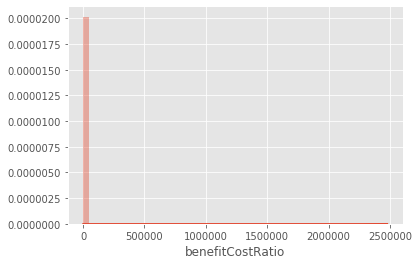

In [17]:
sns.distplot(df['benefitCostRatio'])

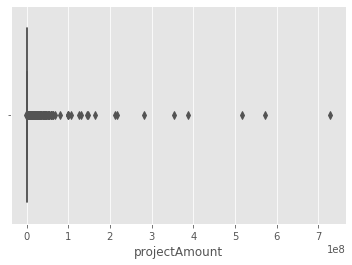

In [18]:
# Looks like projectAmount has outliers - Let's plot it
sns.boxplot(x=df['projectAmount'])

In [19]:
df['projectAmount'].sum()

24154158163.54

In [20]:
df['projectAmount'].median()

114895.5

In [21]:
# Do we have nulls?
df.isna().sum()

region                       0
stateNumberCode              0
programArea                  0
projectAmount               20
programFy                    0
granteeTribalIndicator    6936
benefitCostRatio             0
netValueBenefits          4921
Positive_ROI                 0
dtype: int64

In [22]:
df['projectAmount'].fillna(0.0, axis = 0, inplace=True)
df['projectAmount'].value_counts()

40000.000      186
50000.000      184
100000.000     139
20000.000      120
25000.000      119
              ... 
1252647.000      1
840671.000       1
40254.000        1
31066.670        1
573403.000       1
Name: projectAmount, Length: 24108, dtype: int64

In [23]:
df['netValueBenefits'].fillna(0.0, axis = 0, inplace=True)
df['netValueBenefits'].value_counts()

0.000          14662
21420.000        318
1.000            152
276000.000        96
175000.000        36
               ...  
775151.000         1
387575.000         1
1222617.000        1
3624869.000        1
16552.000          1
Name: netValueBenefits, Length: 13097, dtype: int64

In [24]:
df[(df['projectAmount']<0)]

,region,stateNumberCode,programArea,projectAmount,programFy,granteeTribalIndicator,benefitCostRatio,netValueBenefits,Positive_ROI
3795,5,27,HMGP,-1624776.000,1997,nan,0.000,0.000,0
6134,1,25,HMGP,-110696.000,1991,nan,0.000,0.000,0
22833,5,26,HMGP,-36500.000,1998,nan,0.000,0.000,0


In [25]:
# The outliers need to be addressed
df = df[(df['projectAmount']>0)]

In [26]:
#df['granteeTribalIndicator'].fillna(0.0, axis = 0, inplace=True)
#df['granteeTribalIndicator'].value_counts()

In [27]:
# Did we get all the nulls?
df.isna().sum()

region                       0
stateNumberCode              0
programArea                  0
projectAmount                0
programFy                    0
granteeTribalIndicator    6911
benefitCostRatio             0
netValueBenefits             0
Positive_ROI                 0
dtype: int64

In [28]:
df['benefitCostRatio'] = df['benefitCostRatio'].astype('int64')
df['projectAmount'] = df['projectAmount'].astype('int64')
df['netValueBenefits'] = df['netValueBenefits'].astype('int64')
df['programFy'] = df['programFy'].astype('int64')
#df['granteeTribalIndicator'] = df['granteeTribalIndicator'].astype('int64')

## Vizualizations

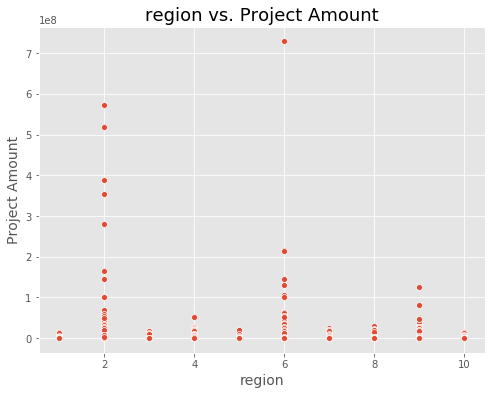

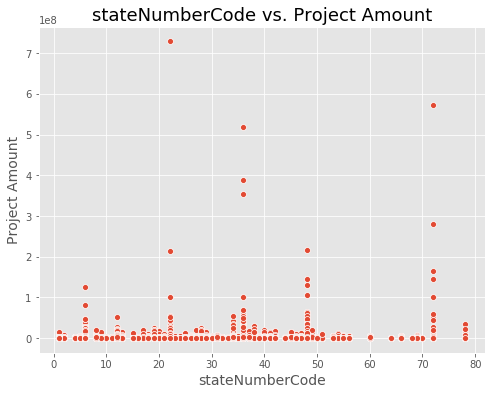

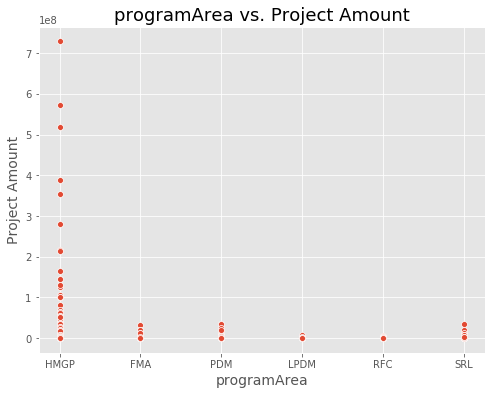

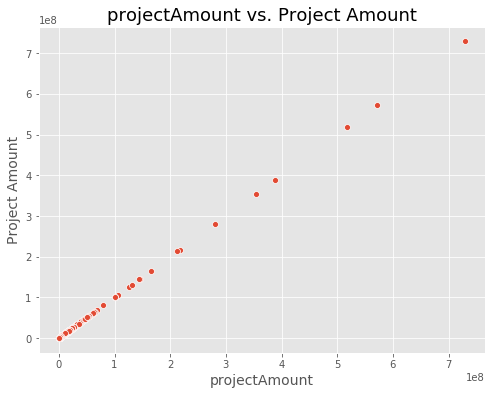

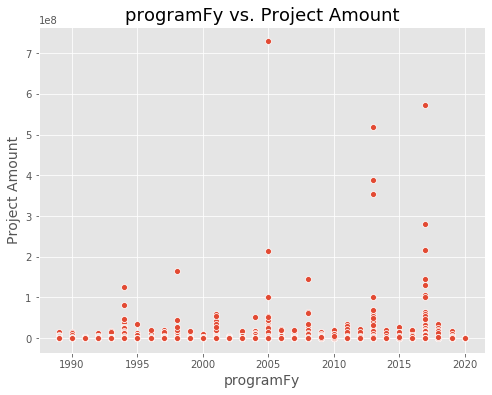

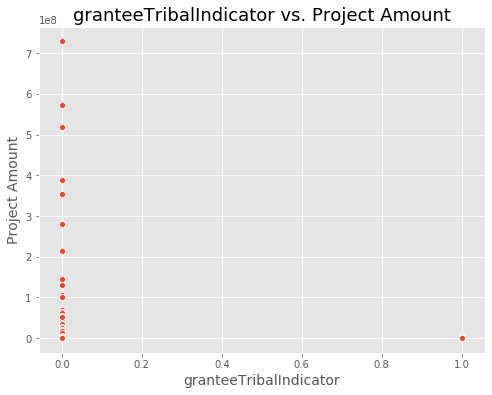

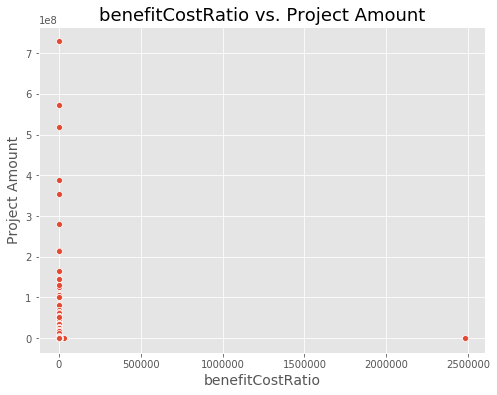

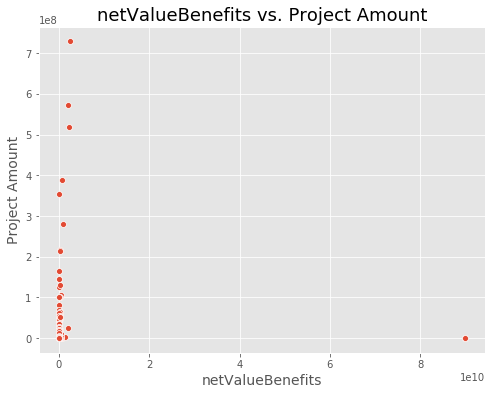

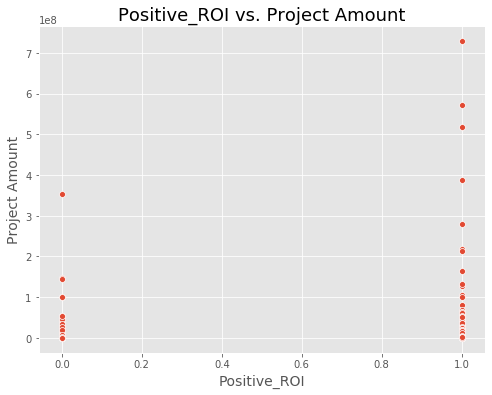

In [29]:
def scatterplot(col):
    ax = plt.figure(figsize = (8,6))
    ax = sns.scatterplot(x = df[col], y = df['projectAmount'])
    ax.set_title('{} vs. Project Amount'.format(col), fontsize = 18)
    ax.set_xlabel('{}'.format(col), fontsize = 14)
    ax.set_ylabel('Project Amount', fontsize = 14);

for col in df:

    scatterplot(col)

In [30]:
# Plotting Price with the categories:
def categorical_plots(df):
    for col in df.select_dtypes('category'):
        fig, ax = plt.subplots(figsize=(10,6))
        sns.barplot(x=col, y='projectAmount', data=df, palette="colorblind")
        ax.set_title(f"{col} vs projectAmount", fontsize=30)
        plt.xticks(rotation=45)
        plt.show()

In [31]:
categorical_plots(df)

As we can see from the following vizuals above SRL () are the most costly hazard mitigation area that is being spent on

# Outlier Removal

In [32]:
# After researching outlier removal 
# and exploring our data it is best to do IQR type outlier removal methods

def outliersiqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    threshold = iqr * 1.5
    outliers = (data < q1 - threshold) | (data > q3 + threshold)
    outliers = pd.Series(outliers, index=data.index)
    return outliers

In [33]:
# Function to make an outlier column which we will then remove outliers from
def outlierscolumn(df, columns, verbose=True):
    new_df = df.copy()
    for col in columns:
        outliers = outliersiqr(new_df[col])
        if verbose:
            print(f'{outliers.sum()} outliers found in {col}')
        new_df[f'{col}_outliers'] = outliers
    return new_df

In [34]:
# Feeding in the numerical columns for identifying outliers
num_cols = list(df.select_dtypes('number').columns)

# Saving the new dataframe with outlier columns added
df2 = outlierscolumn(df, num_cols)

0 outliers found in region
0 outliers found in stateNumberCode
3833 outliers found in projectAmount
0 outliers found in programFy
0 outliers found in granteeTribalIndicator
4102 outliers found in benefitCostRatio
4561 outliers found in netValueBenefits
0 outliers found in Positive_ROI


In [35]:
df2.head()

,region,stateNumberCode,programArea,projectAmount,programFy,granteeTribalIndicator,benefitCostRatio,netValueBenefits,Positive_ROI,region_outliers,stateNumberCode_outliers,projectAmount_outliers,programFy_outliers,granteeTribalIndicator_outliers,benefitCostRatio_outliers,netValueBenefits_outliers,Positive_ROI_outliers
0,6,48,HMGP,402910,2011,0.000,4,2969310,1,False,False,False,False,False,True,True,False
1,5,18,HMGP,366071,2011,0.000,1,961452,1,False,False,False,False,False,False,False,False
2,7,19,HMGP,96965,2011,0.000,0,0,0,False,False,False,False,False,False,False,False
3,2,36,HMGP,5932500,2011,0.000,0,0,0,False,False,True,False,False,False,False,False
4,7,19,HMGP,34245,2011,0.000,0,0,0,False,False,False,False,False,False,False,False


In [36]:
# Creating a list of the outlier columns
outliercols = []
for col in df2.columns:
    if 'outliers' in col:
        outliercols.append(col)
outliercols

['region_outliers',
 'stateNumberCode_outliers',
 'projectAmount_outliers',
 'programFy_outliers',
 'granteeTribalIndicator_outliers',
 'benefitCostRatio_outliers',
 'netValueBenefits_outliers',
 'Positive_ROI_outliers']

In [37]:
df2.shape

(29576, 17)

In [38]:
# Dropping columns that are either continous or boolean (yes or no, has or doesn't have)
#df2= df2.drop(columns=['region_outliers', 'stateNumberCode_outliers', 'programFy_outliers'])

In [39]:
# Creating a list of the outlier columns
outliercols = []
for col in df2.columns:
    if 'outliers' in col:
        outliercols.append(col)
outliercols

['region_outliers',
 'stateNumberCode_outliers',
 'projectAmount_outliers',
 'programFy_outliers',
 'granteeTribalIndicator_outliers',
 'benefitCostRatio_outliers',
 'netValueBenefits_outliers',
 'Positive_ROI_outliers']

In [40]:
# Filtering the outliers out of my dataframe and returning only the entries
# that are not outliers for any of the features
for col in outliercols:
    df2 = df2[(df2[col]==False)]
df2.shape

(21860, 17)

In [41]:
# Dropping the outlier columns that were added
for col in outliercols:
    df2.drop(columns=[col], axis=1, inplace=True)

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21860 entries, 1 to 29627
Data columns (total 9 columns):
region                    21860 non-null int64
stateNumberCode           21860 non-null int64
programArea               21860 non-null object
projectAmount             21860 non-null int64
programFy                 21860 non-null int64
granteeTribalIndicator    16466 non-null float64
benefitCostRatio          21860 non-null int64
netValueBenefits          21860 non-null int64
Positive_ROI              21860 non-null int32
dtypes: float64(1), int32(1), int64(6), object(1)
memory usage: 1.6+ MB


In [43]:
df=df2

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21860 entries, 1 to 29627
Data columns (total 9 columns):
region                    21860 non-null int64
stateNumberCode           21860 non-null int64
programArea               21860 non-null object
projectAmount             21860 non-null int64
programFy                 21860 non-null int64
granteeTribalIndicator    16466 non-null float64
benefitCostRatio          21860 non-null int64
netValueBenefits          21860 non-null int64
Positive_ROI              21860 non-null int32
dtypes: float64(1), int32(1), int64(6), object(1)
memory usage: 1.6+ MB


In [45]:
df.region.value_counts()

4     5906
6     2800
5     2097
7     1776
1     1704
9     1689
3     1657
8     1580
2     1545
10    1106
Name: region, dtype: int64

In [46]:
df.stateNumberCode.value_counts()

12    1493
6     1242
1     1175
40     940
13     794
19     788
48     777
36     662
28     653
22     627
21     585
34     572
46     564
37     557
42     505
55     463
39     445
51     429
27     428
53     423
38     410
50     401
31     380
25     373
26     339
20     329
47     325
45     324
5      320
23     310
33     303
24     300
41     282
29     279
54     278
72     252
17     241
30     233
2      204
8      199
16     197
9      197
18     181
35     136
4      135
44     120
10     109
49     102
15      85
32      81
56      72
78      59
69      51
11      36
64      31
66      30
60      22
70       7
68       5
Name: stateNumberCode, dtype: int64

In [47]:
# Very important category as it shows why the mitigation is being done
df.programArea.value_counts()

HMGP    16109
PDM      3209
FMA      2106
LPDM      196
SRL       163
RFC        77
Name: programArea, dtype: int64

Text(0.5, 1.0, 'Program Area vs. Project Amount')

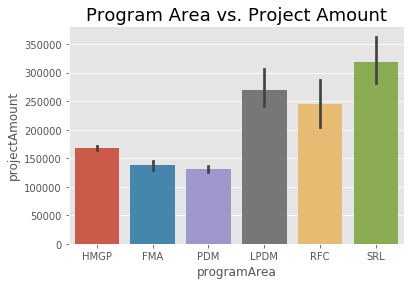

In [48]:
ax = sns.barplot(x="programArea", y="projectAmount", data=df)
ax.set_title('Program Area vs. Project Amount', fontsize = 18)

Text(0.5, 1.0, 'Program Area vs. Project Amount')

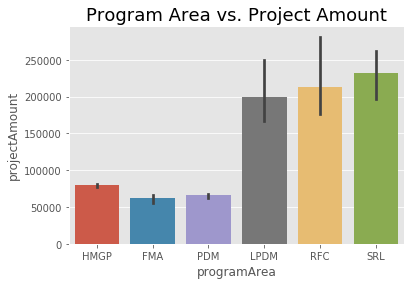

In [49]:
ax = sns.barplot(x="programArea", y="projectAmount", data=df, estimator=np.median)
ax.set_title('Program Area vs. Project Amount', fontsize = 18)

In [50]:
#df.projectIdentifier.value_counts()

In [51]:
df.projectAmount.value_counts()

40000     184
50000     179
100000    128
25000     119
20000     116
         ... 
93047       1
2748        1
206832      1
98400       1
65536       1
Name: projectAmount, Length: 16969, dtype: int64

In [52]:
df.programFy.value_counts()

2011    1665
2005    1299
2017    1215
2008    1107
1998    1061
2013     993
2007     990
2010     955
2009     938
2001     820
2004     806
2003     779
2016     777
2014     765
1997     719
2002     702
2015     700
2018     695
1996     665
1994     606
2000     518
2019     508
1999     502
2012     494
2006     408
1995     273
1993     268
1992     215
1990     162
1991     147
1989      97
2020      11
Name: programFy, dtype: int64

In [53]:
df = df[(df['projectAmount']>1998)]

In [54]:
df.benefitCostRatio.value_counts()

0    14049
1     6234
2     1342
Name: benefitCostRatio, dtype: int64

In [55]:
df.netValueBenefits.value_counts()

0         13795
21420       311
1           140
276000       82
175000       35
          ...  
372320        1
124214        1
105785        1
48445         1
215137        1
Name: netValueBenefits, Length: 6608, dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21625 entries, 1 to 29627
Data columns (total 9 columns):
region                    21625 non-null int64
stateNumberCode           21625 non-null int64
programArea               21625 non-null object
projectAmount             21625 non-null int64
programFy                 21625 non-null int64
granteeTribalIndicator    16337 non-null float64
benefitCostRatio          21625 non-null int64
netValueBenefits          21625 non-null int64
Positive_ROI              21625 non-null int32
dtypes: float64(1), int32(1), int64(6), object(1)
memory usage: 1.6+ MB


# One Hot Encoding and EDA

In [57]:
for col in df.columns:
    print(col, df[col].nunique())

region 10
stateNumberCode 59
programArea 6
projectAmount 16763
programFy 32
granteeTribalIndicator 2
benefitCostRatio 3
netValueBenefits 6608
Positive_ROI 2


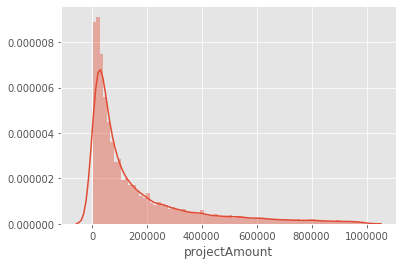

In [58]:
sns.distplot(df['projectAmount'], bins='auto')

**From the distplot we can see that there is a large skew that needs to be addressed. We will further remove the extreme outliers in projectAmount.**

In [59]:
df.shape

(21625, 9)

In [60]:
# The outliers need to be addressed
df = df[(df['projectAmount']<500000)]

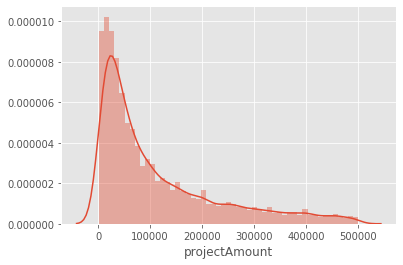

In [61]:
sns.distplot(df['projectAmount'], bins='auto')

In [62]:
df.shape

(19721, 9)

In [63]:
df['region'] = df['region'].astype('category') 
df['stateNumberCode'] = df['stateNumberCode'].astype('category') 
df['programFy'] = df['programFy'].astype('category')

In [64]:
pd.get_dummies(df)

,projectAmount,granteeTribalIndicator,benefitCostRatio,netValueBenefits,Positive_ROI,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,stateNumberCode_1,stateNumberCode_2,stateNumberCode_4,stateNumberCode_5,stateNumberCode_6,stateNumberCode_8,stateNumberCode_9,stateNumberCode_10,stateNumberCode_11,stateNumberCode_12,stateNumberCode_13,stateNumberCode_15,stateNumberCode_16,stateNumberCode_17,stateNumberCode_18,stateNumberCode_19,stateNumberCode_20,stateNumberCode_21,stateNumberCode_22,stateNumberCode_23,stateNumberCode_24,stateNumberCode_25,stateNumberCode_26,stateNumberCode_27,stateNumberCode_28,...,stateNumberCode_72,stateNumberCode_78,programArea_FMA,programArea_HMGP,programArea_LPDM,programArea_PDM,programArea_RFC,programArea_SRL,programFy_1989,programFy_1990,programFy_1991,programFy_1992,programFy_1993,programFy_1994,programFy_1995,programFy_1996,programFy_1997,programFy_1998,programFy_1999,programFy_2000,programFy_2001,programFy_2002,programFy_2003,programFy_2004,programFy_2005,programFy_2006,programFy_2007,programFy_2008,programFy_2009,programFy_2010,programFy_2011,programFy_2012,programFy_2013,programFy_2014,programFy_2015,programFy_2016,programFy_2017,programFy_2018,programFy_2019,programFy_2020
1,366071,0.000,1,961452,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,96965,0.000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,34245,0.000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,25609,0.000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10,109900,0.000,0,108817,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29619,356900,0.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29620,25000,0.000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29622,8720,0.000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29626,21000,0.000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


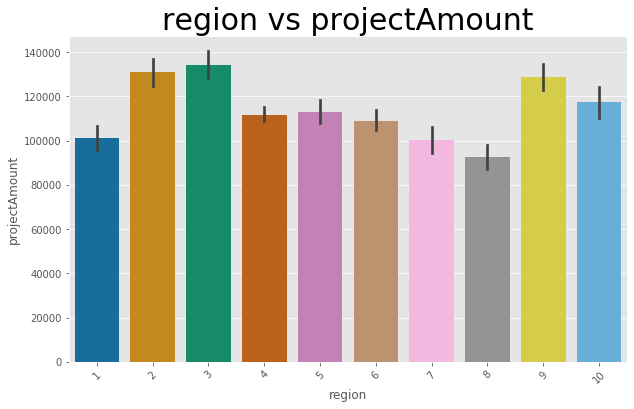

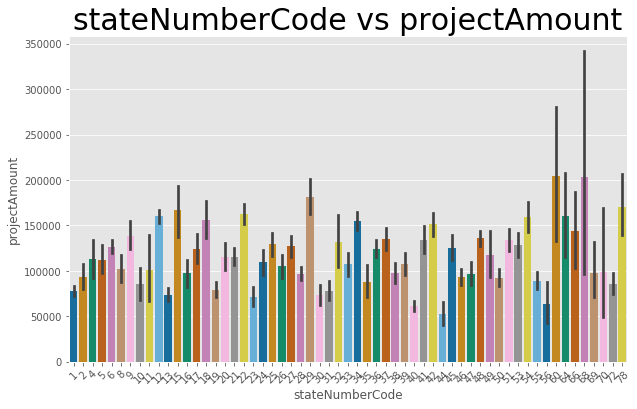

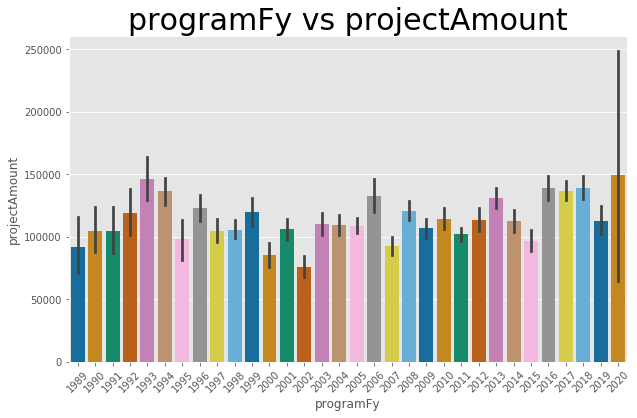

In [65]:
categorical_plots(df)

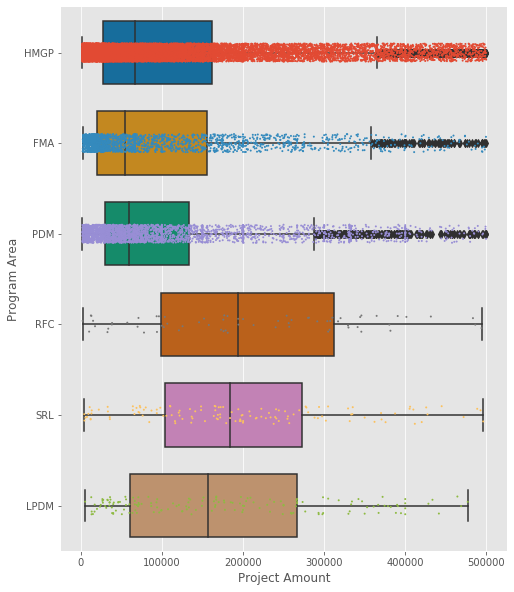

In [66]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="projectAmount", y="programArea", data=df,
            width=0.7, palette="colorblind")

# Add in points to show each observation
sns.stripplot(x="projectAmount", y="programArea", data=df,
              size=2, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Program Area")
ax.set(xlabel="Project Amount")
sns.despine(left=True)

# https://seaborn.pydata.org/examples/horizontal_boxplot.html

In [67]:
#sns.distplot(x='projectAmount, col="Positive_ROI", kde=True)

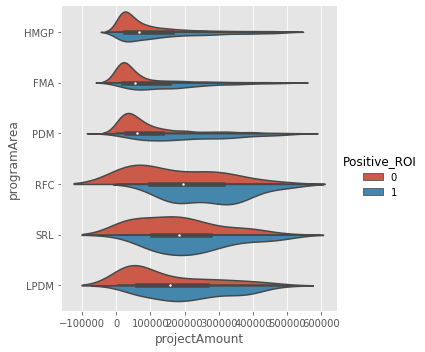

In [68]:
sns.catplot(x="projectAmount", y="programArea", hue="Positive_ROI",
            kind="violin", split=True, pallete="colorblind", data=df)

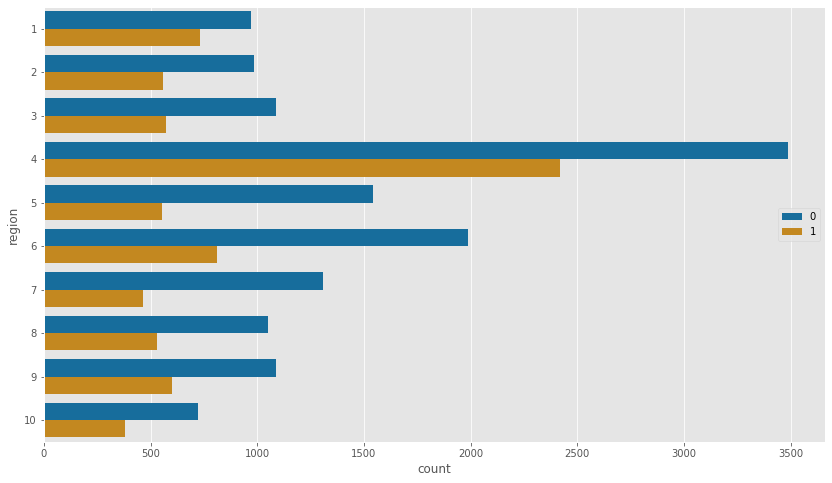

In [69]:
#Plot region vs. ROI
plt.figure(figsize=(14, 8))
sns.countplot(y=df2['region'], hue=df2['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

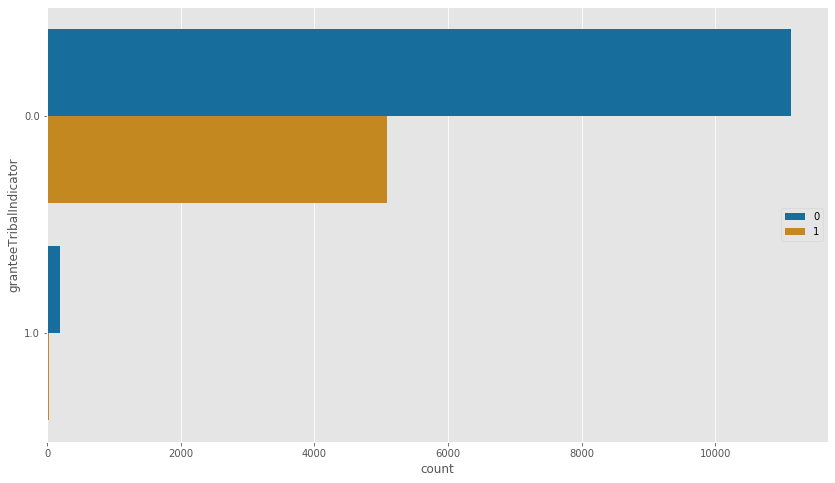

In [70]:
# Plot tribal indicator projects vs. ROI
plt.figure(figsize=(14, 8))
sns.countplot(y=df2['granteeTribalIndicator'], hue=df2['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

In [71]:
# Dropping the tribal indicator as there aren't 
# that many tribal projects in our dataset to use for modeling
df.drop(columns=['granteeTribalIndicator'], inplace=True)

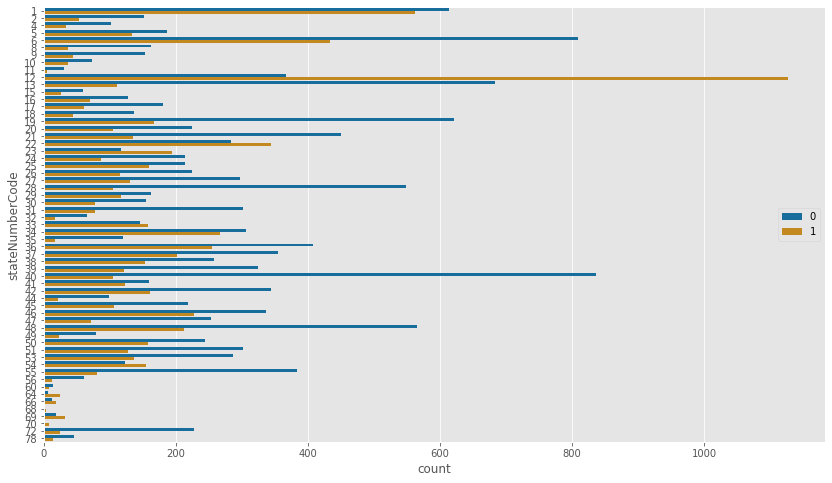

In [72]:
#Plot stateNumberCode vs. ROI
plt.figure(figsize=(14, 8))
sns.countplot(y=df2['stateNumberCode'], hue=df2['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

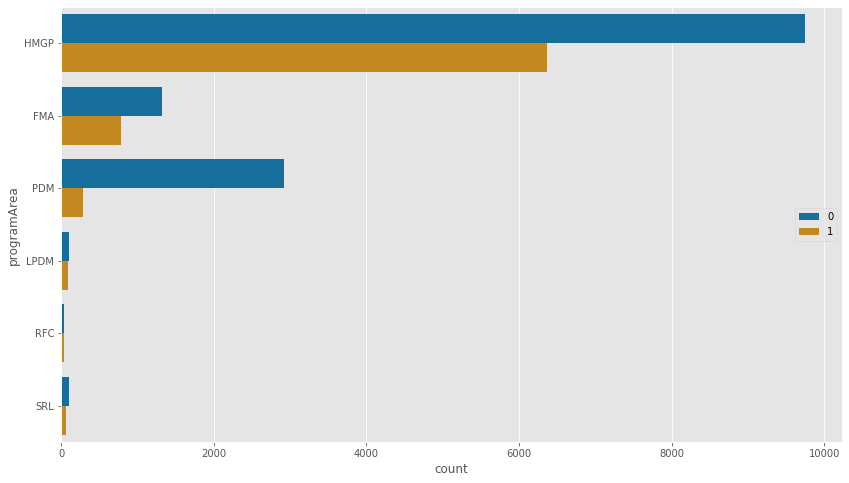

In [73]:
#Plot programArea vs. ROI
plt.figure(figsize=(14, 8))
sns.countplot(y=df2['programArea'], hue=df2['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

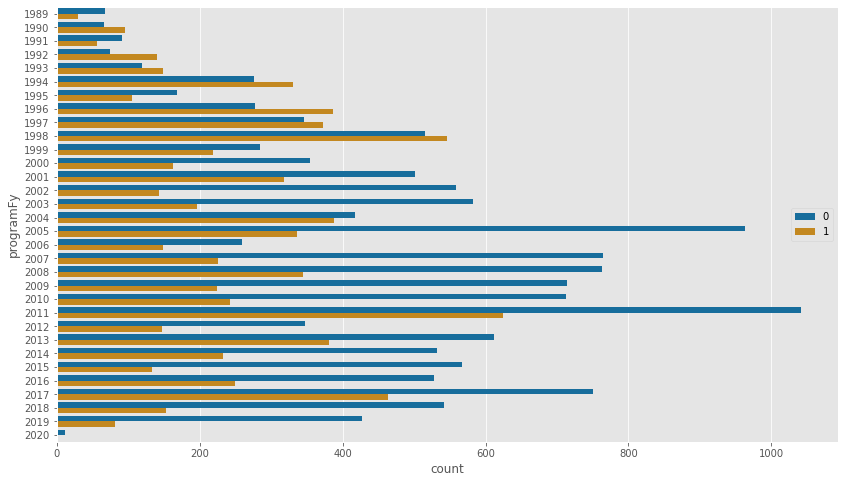

In [74]:
#Plot programFy vs. ROI
plt.figure(figsize=(14, 8))
sns.countplot(y=df2['programFy'], hue=df2['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

In [75]:
# Vizual to show 

In [76]:
df2 = pd.get_dummies(df)

In [77]:
df2.drop(columns=['benefitCostRatio'], inplace=True)

In [78]:
df=df2

In [79]:
df.head()

,projectAmount,netValueBenefits,Positive_ROI,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,stateNumberCode_1,stateNumberCode_2,stateNumberCode_4,stateNumberCode_5,stateNumberCode_6,stateNumberCode_8,stateNumberCode_9,stateNumberCode_10,stateNumberCode_11,stateNumberCode_12,stateNumberCode_13,stateNumberCode_15,stateNumberCode_16,stateNumberCode_17,stateNumberCode_18,stateNumberCode_19,stateNumberCode_20,stateNumberCode_21,stateNumberCode_22,stateNumberCode_23,stateNumberCode_24,stateNumberCode_25,stateNumberCode_26,stateNumberCode_27,stateNumberCode_28,stateNumberCode_29,stateNumberCode_30,...,stateNumberCode_72,stateNumberCode_78,programArea_FMA,programArea_HMGP,programArea_LPDM,programArea_PDM,programArea_RFC,programArea_SRL,programFy_1989,programFy_1990,programFy_1991,programFy_1992,programFy_1993,programFy_1994,programFy_1995,programFy_1996,programFy_1997,programFy_1998,programFy_1999,programFy_2000,programFy_2001,programFy_2002,programFy_2003,programFy_2004,programFy_2005,programFy_2006,programFy_2007,programFy_2008,programFy_2009,programFy_2010,programFy_2011,programFy_2012,programFy_2013,programFy_2014,programFy_2015,programFy_2016,programFy_2017,programFy_2018,programFy_2019,programFy_2020
1,366071,961452,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,96965,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,34245,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,25609,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10,109900,108817,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# Logistic Model #1

### Supervised Machine Learning Algorithm that can be used for Classification or Regression. Used to predict the categorical dependent variable with the help of independent variables.

In [80]:
#Split features and target
X = df.drop(columns=['Positive_ROI'], axis=1)
y = df['Positive_ROI']

# Normalizing the data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X.head()

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)
    
#Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
#Create function to easily build models and display results
def build_model(classifier, X_train, X_test, y_train,  y_test):
    '''Build classification model, returning classification report, train and test accuracy, and confusion matrix.
    
    Keyword arguments: 
    classifier -- classification algorithm
    predictors -- X, features
    labels -- y, target
    '''
    
    #Create variables that can be called outside function
    #build_model.X_train = X_train
    #build_model.X_test = X_test
    #build_model.y_train = y_train
    #build_model.y_test = y_test
    
    #Fit model
    classifier.fit(X_train, y_train)
    #score = np.mean(cross_val_score(classifier, X, y, cv=5, scoring='recall'))

    #Create predictions
    y_hat_train = classifier.predict(X_train)
    y_hat_test = classifier.predict(X_test)
    
    #Create variables that can be called outside function
    #build_model.y_hat_train = y_hat_train
    #build_model.y_hat_test = y_hat_test
    
    #Print classification report
    print('Train Classification Report\n', classification_report(y_train, y_hat_train))
    print('Test Classification Report\n', classification_report(y_test, y_hat_test))
    
    print('Train Accuracy:', round(accuracy_score(y_train, y_hat_train), 3))
    print('Test Accuracy:', round(accuracy_score(y_test, y_hat_test), 3))
    #print('Cross Validation Recall', round(score, 3))
    
    #Create a results dataframe
    #results = pd.DataFrame([[str(model), round(accuracy_score(y_train, y_hat_train), 3), 
     #                        round(accuracy_score(y_test, y_hat_test), 3), round(score, 3)]], 
      #                    columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'Cross_Val_Recall'])
    #build_model.results = results
    
    #Plot Confusion Matrices
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
    plot_confusion_matrix(classifier, X_train, y_train,
                     cmap=plt.cm.Blues, ax=axes[0], normalize='true')
    fig.suptitle('Train & Test Confusion Matrices', fontsize=16);
    
    plot_confusion_matrix(classifier, X_test, y_test,
                     cmap=plt.cm.Blues, ax=axes[1], normalize='true')
    plt.subplots_adjust(wspace=0.4)
    return classifier    

Train Classification Report
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     10718
           1       0.96      0.88      0.92      5058

    accuracy                           0.95     15776
   macro avg       0.95      0.93      0.94     15776
weighted avg       0.95      0.95      0.95     15776

Test Classification Report
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      2617
           1       0.96      0.88      0.92      1328

    accuracy                           0.95      3945
   macro avg       0.95      0.93      0.94      3945
weighted avg       0.95      0.95      0.95      3945

Train Accuracy: 0.95
Test Accuracy: 0.947


LogisticRegression()

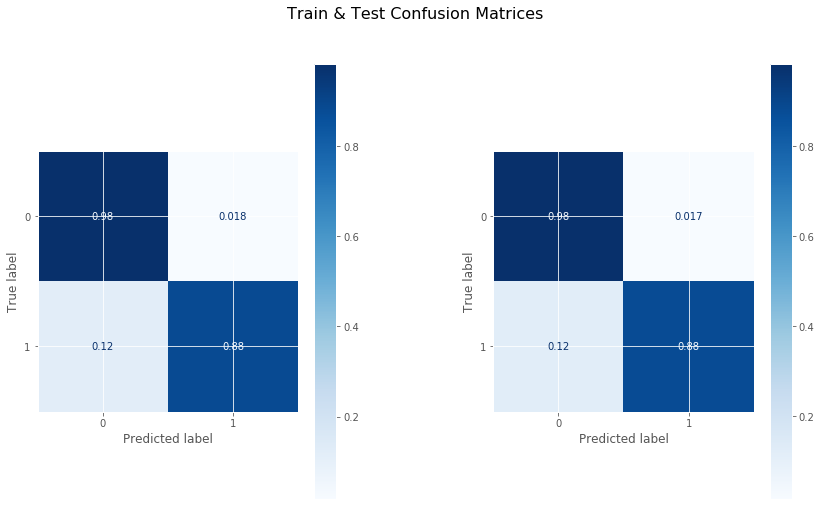

In [82]:
log_reg = LogisticRegression()
build_model(log_reg, X_train, X_test, y_train,  y_test)

## Results:
- Train Accuracy: 0.946
- Test Accuracy: 0.944

In [83]:
features = '+'.join(df.drop('Positive_ROI', axis = 1).columns)
formula = 'Positive_ROI ~' + features
model1 = smf.ols(formula, df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Positive_ROI   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     198.2
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:37:26   Log-Likelihood:                -6321.3
No. Observations:               19721   AIC:                         1.284e+04
Df Residuals:                   19624   BIC:                         1.360e+04
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1715      0.009     19.207      0.000       0.154       0.189
projectAmount       -1.54e-07   2.45e-08     -6.288      0.000   -2.02e-07   -1.06e-07
netValueBenefits    1.245e-06   1.32e-08     94.629      0.000    1.22e-06    1.27e-06
region_1               0.0949      0.008     12.099      0.000       0.079       0.110
region_2               0.0138      0.011      1.235      0.217      -0.008       0.036
region_3              -0.0086      0.010     -0.830      0.407      -0.029       0.012
region_4               0.0186      0.005      3.385      0.001       0.008       0.029
region_5              -0.0326      0.007     -4.516      0.000      -0.047      -0.018
region_6              -0.0245      0.007     -3.335      0.001      -0.039      -0.010
region_7              -0.0402      0.008     -5.273      0.000      -0.055      -0.025
region_8               0.0121      0.009      1.311      0.190      -0.006       0.030
region_9               0.1142      0.020      5.582      0.000       0.074       0.154
region_10              0.0237      0.009      2.760      0.006       0.007       0.041
stateNumberCode_1      0.1910      0.011     18.018      0.000       0.170       0.212
stateNumberCode_2     -0.0097      0.021     -0.464      0.643      -0.050       0.031
stateNumberCode_4     -0.1230      0.035     -3.500      0.000      -0.192      -0.054
stateNumberCode_5      0.0274      0.018      1.482      0.138      -0.009       0.064
stateNumberCode_6     -0.1214      0.025     -4.897      0.000      -0.170      -0.073
stateNumberCode_8     -0.0789      0.023     -3.447      0.001      -0.124      -0.034
stateNumberCode_9     -0.1225      0.022     -5.479      0.000      -0.166      -0.079
stateNumberCode_10     0.0393      0.030      1.320      0.187      -0.019       0.098
stateNumberCode_11    -0.0677      0.048     -1.399      0.162      -0.163       0.027
stateNumberCode_12     0.2706      0.010     27.119      0.000       0.251       0.290
stateNumberCode_13    -0.1664      0.012    -13.585      0.000      -0.190      -0.142
stateNumberCode_15    -0.0980      0.042     -2.359      0.018      -0.179      -0.017
stateNumberCode_16     0.0595      0.021      2.881      0.004       0.019       0.100
stateNumberCode_17    -0.0600      0.021     -2.903      0.004      -0.101      -0.019
stateNumberCode_18     0.0019      0.024      0.078      0.938      -0.045       0.048
stateNumberCode_19    -0.0243      0.012     -1.955      0.051      -0.049    6.28e-05
stateNumberCode_20     0.0013      0.017      0.077      0.939      -0.032       0.035
stateNumberCode_21    -0.0746      0.014     -5.331      0.000      -0.102      -0.047
stateNumberCode_22     0.1087      0.015      7.253      0.000       0.079       0.138
stateNumberCode_23     0.2152      0.0

In [84]:
model1.params

Intercept           0.171
projectAmount      -0.000
netValueBenefits    0.000
region_1            0.095
region_2            0.014
                    ...  
programFy_2016      0.006
programFy_2017     -0.005
programFy_2018     -0.052
programFy_2019     -0.151
programFy_2020     -0.240
Length: 110, dtype: float64

### We can see that we have some columns/features that are highly correlated including projectAmount, which is used to calculate the Positive ROI and netValueBenefits which has the same issue of correlation. Because of this we will delete these two columns

# Logistic Model #2

In [85]:
df.drop(columns=['projectAmount', 'netValueBenefits'], inplace=True)

In [86]:
df.head()

,Positive_ROI,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,stateNumberCode_1,stateNumberCode_2,stateNumberCode_4,stateNumberCode_5,stateNumberCode_6,stateNumberCode_8,stateNumberCode_9,stateNumberCode_10,stateNumberCode_11,stateNumberCode_12,stateNumberCode_13,stateNumberCode_15,stateNumberCode_16,stateNumberCode_17,stateNumberCode_18,stateNumberCode_19,stateNumberCode_20,stateNumberCode_21,stateNumberCode_22,stateNumberCode_23,stateNumberCode_24,stateNumberCode_25,stateNumberCode_26,stateNumberCode_27,stateNumberCode_28,stateNumberCode_29,stateNumberCode_30,stateNumberCode_31,stateNumberCode_32,...,stateNumberCode_72,stateNumberCode_78,programArea_FMA,programArea_HMGP,programArea_LPDM,programArea_PDM,programArea_RFC,programArea_SRL,programFy_1989,programFy_1990,programFy_1991,programFy_1992,programFy_1993,programFy_1994,programFy_1995,programFy_1996,programFy_1997,programFy_1998,programFy_1999,programFy_2000,programFy_2001,programFy_2002,programFy_2003,programFy_2004,programFy_2005,programFy_2006,programFy_2007,programFy_2008,programFy_2009,programFy_2010,programFy_2011,programFy_2012,programFy_2013,programFy_2014,programFy_2015,programFy_2016,programFy_2017,programFy_2018,programFy_2019,programFy_2020
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


<Figure size 864x432 with 0 Axes>

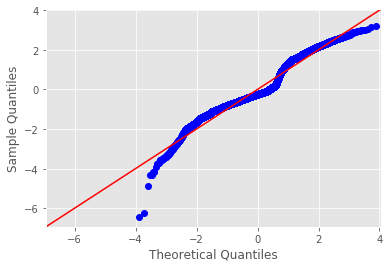

In [87]:
# QQ plot to see if our data is linear
fig1 = plt.figure(figsize = (12,6))
fig1 = sm.graphics.qqplot(model1.resid,fit=True, line='45');

In [88]:
# Coment on qq plot
# R-squared .4

Train Classification Report
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     10718
           1       0.96      0.88      0.92      5058

    accuracy                           0.95     15776
   macro avg       0.95      0.93      0.94     15776
weighted avg       0.95      0.95      0.95     15776

Test Classification Report
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      2617
           1       0.96      0.88      0.92      1328

    accuracy                           0.95      3945
   macro avg       0.95      0.93      0.94      3945
weighted avg       0.95      0.95      0.95      3945

Train Accuracy: 0.95
Test Accuracy: 0.947


LogisticRegression()

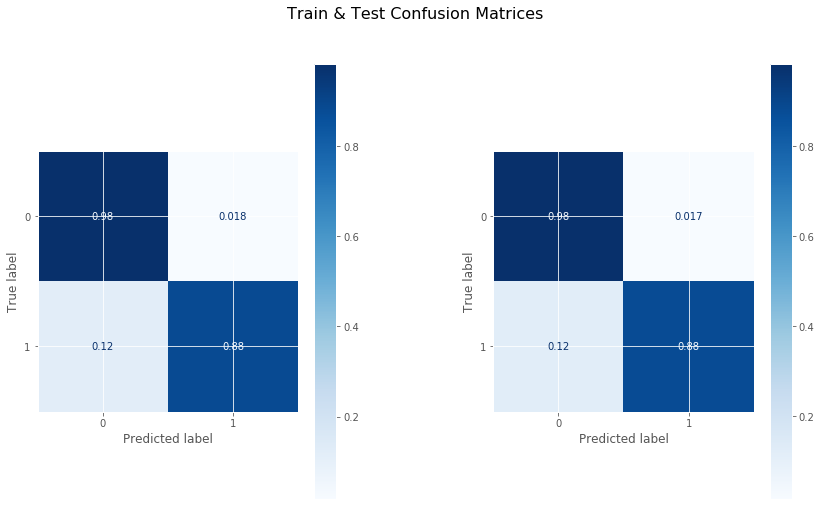

In [89]:
log_reg_2 = LogisticRegression()
build_model(log_reg, X_train, X_test, y_train,  y_test)

In [90]:
features = '+'.join(df.drop('Positive_ROI', axis = 1).columns)
formula = 'Positive_ROI ~' + features
model1 = smf.ols(formula, df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Positive_ROI   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     54.76
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:37:29   Log-Likelihood:                -10709.
No. Observations:               19721   AIC:                         2.161e+04
Df Residuals:                   19626   BIC:                         2.236e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.783e+11   5.55e+11      0.321      0.748    -9.1e+11    1.27e+12
region_1            -6.86e+10   1.06e+11     -0.650      0.516   -2.76e+11    1.38e+11
region_2            5.319e+11      4e+11      1.329      0.184   -2.53e+11    1.32e+12
region_3           -3.004e+11   3.34e+11     -0.899      0.368   -9.55e+11    3.54e+11
region_4            2.187e+11   1.71e+11      1.277      0.202   -1.17e+11    5.54e+11
region_5           -2.267e+11   2.97e+11     -0.765      0.444   -8.08e+11    3.54e+11
region_6           -7.285e+10   1.16e+11     -0.631      0.528   -2.99e+11    1.54e+11
region_7           -7.896e+11   7.08e+11     -1.115      0.265   -2.18e+12    5.99e+11
region_8           -4.387e+11   3.34e+11     -1.312      0.190   -1.09e+12    2.17e+11
region_9           -1.303e+11   1.51e+11     -0.863      0.388   -4.26e+11    1.65e+11
region_10          -1.325e+11   1.29e+11     -1.026      0.305   -3.85e+11    1.21e+11
stateNumberCode_1  -3.677e+11   2.18e+11     -1.685      0.092   -7.96e+11    6.01e+10
stateNumberCode_2  -1.661e+10   4.42e+10     -0.376      0.707   -1.03e+11       7e+10
stateNumberCode_4  -1.882e+10   1.37e+10     -1.369      0.171   -4.58e+10    8.12e+09
stateNumberCode_5  -7.621e+10    8.9e+10     -0.856      0.392   -2.51e+11    9.82e+10
stateNumberCode_6  -1.882e+10   1.37e+10     -1.369      0.171   -4.58e+10    8.12e+09
stateNumberCode_8   2.896e+11   3.05e+11      0.949      0.342   -3.08e+11    8.88e+11
stateNumberCode_9  -8.047e+10   1.86e+11     -0.433      0.665   -4.45e+11    2.84e+11
stateNumberCode_10  1.513e+11   3.02e+11      0.502      0.616    -4.4e+11    7.42e+11
stateNumberCode_11  1.513e+11   3.02e+11      0.502      0.616    -4.4e+11    7.42e+11
stateNumberCode_12 -3.677e+11   2.18e+11     -1.685      0.092   -7.96e+11    6.01e+10
stateNumberCode_13 -3.677e+11   2.18e+11     -1.685      0.092   -7.96e+11    6.01e+10
stateNumberCode_15 -1.882e+10   1.37e+10     -1.369      0.171   -4.58e+10    8.12e+09
stateNumberCode_16 -1.661e+10   4.42e+10     -0.376      0.707   -1.03e+11       7e+10
stateNumberCode_17  7.767e+10   2.87e+11      0.271      0.786   -4.84e+11     6.4e+11
stateNumberCode_18  7.767e+10   2.87e+11      0.271      0.786   -4.84e+11     6.4e+11
stateNumberCode_19  6.406e+11   7.04e+11      0.910      0.363   -7.39e+11    2.02e+12
stateNumberCode_20  6.406e+11   7.04e+11      0.910      0.363   -7.39e+11    2.02e+12
stateNumberCode_21 -3.677e+11   2.18e+11     -1.685      0.092   -7.96e+11    6.01e+10
stateNumberCode_22 -7.621e+10    8.9e+10     -0.856      0.392   -2.51e+11    9.82e+10
stateNumberCode_23 -8.047e+10   1.86e+11     -0.433      0.665   -4.45e+11    2.84e+11
stateNumberCode_24  1.513e+11   3.02e+11      0.502      0.616    -4.4e+11    7.42e+11
stateNumberCode_25 -8.047e+10   1.86e+

In [91]:
model1.params

Intercept         178259268796.756
region_1          -68603246594.460
region_2          531891806705.496
region_3         -300377666572.195
region_4          218657375172.626
                        ...       
programFy_2016   -153277002297.421
programFy_2017   -153277002297.422
programFy_2018   -153277002297.525
programFy_2019   -153277002297.671
programFy_2020   -153277002297.808
Length: 108, dtype: float64

**To note in our first logistic regression model we can see that regions 1, 2, 3, and 4 are the strongest intercepts.**

Train Classification Report
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     10718
           1       0.96      0.88      0.92      5058

    accuracy                           0.95     15776
   macro avg       0.95      0.93      0.94     15776
weighted avg       0.95      0.95      0.95     15776

Test Classification Report
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      2617
           1       0.96      0.88      0.92      1328

    accuracy                           0.95      3945
   macro avg       0.95      0.93      0.94      3945
weighted avg       0.95      0.95      0.95      3945

Train Accuracy: 0.95
Test Accuracy: 0.947


LogisticRegression()

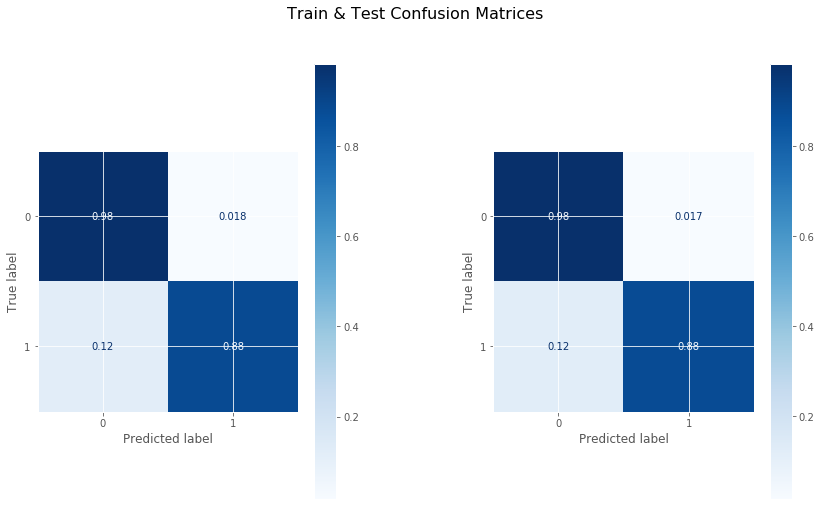

In [92]:
log_reg = LogisticRegression()
build_model(log_reg, X_train, X_test, y_train,  y_test)

**No changes have occurred because the only thing that we have changed is removing two variables that were highly correlated to our target.**

# Baye's Classification Model

## Classifies based on conditional probabilities of finding certain features

Train Classification Report
               precision    recall  f1-score   support

           0       0.92      0.72      0.81     10718
           1       0.59      0.87      0.70      5058

    accuracy                           0.77     15776
   macro avg       0.76      0.79      0.76     15776
weighted avg       0.81      0.77      0.77     15776

Test Classification Report
               precision    recall  f1-score   support

           0       0.90      0.71      0.80      2617
           1       0.60      0.85      0.70      1328

    accuracy                           0.76      3945
   macro avg       0.75      0.78      0.75      3945
weighted avg       0.80      0.76      0.77      3945

Train Accuracy: 0.767
Test Accuracy: 0.759


GaussianNB()

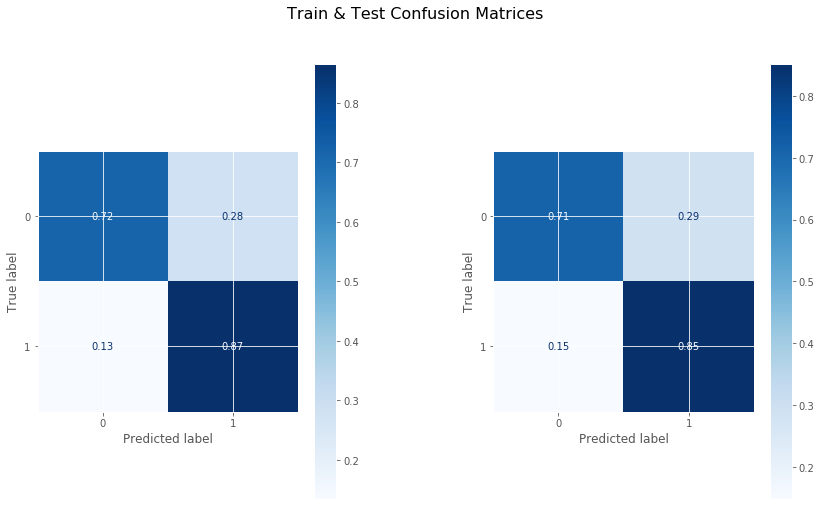

In [93]:
bayesmodel = GaussianNB()
build_model(bayesmodel, X_train, X_test, y_train,  y_test)

# Multinomial Bayes Model

## What is it?

In [95]:
multinomialbayesmodel = build_model(MultinomialNB(), X, y)
multinomialmodel_results = build_model.results

TypeError: build_model() missing 2 required positional arguments: 'y_train' and 'y_test'

# Decision Tree Model

## Classifies based on conditional probabilities, splits based on Gini/entropy


In [96]:
descisionmodel = build_model(DecisionTreeClassifier(random_state=123), X, y)
decisionmodel_results = build_model.results

TypeError: build_model() missing 2 required positional arguments: 'y_train' and 'y_test'

# Random Forest Model

## Uses multiple decision trees to create a "forest"; each tree uses a random set of sample features

In [97]:
randomforestmodel = build_model(RandomForestClassifier(random_state=123), X, y)
randomforestmodel_results = build_model.results

TypeError: build_model() missing 2 required positional arguments: 'y_train' and 'y_test'

# XGBoost Model


## Stands for “Extreme Gradient Boosting”. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [98]:
xgboostmodel = build_model(xgboost.XGBClassifier(random_state=123), X, y)
xgboostmodel9_results = build_model.results

TypeError: build_model() missing 2 required positional arguments: 'y_train' and 'y_test'

# Hyptertuning with an XGBoost Model

In [ ]:
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [1, 2, 3],
    'n_estimators': [50, 100],
    'scale_pos_weight': [5]
}

In [ ]:
grid_clf = GridSearchCV(xgboost.XGBClassifier(random_state=123), param_grid=param_grid, scoring='recall', 
                        cv=3, n_jobs=1, return_train_score=True)
grid_clf.fit(build_model.X_train, build_model.y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))
    
# Mean training score
gs_training_score = np.mean(grid_clf.cv_results_['mean_train_score'])

# Mean test score
gs_testing_score = grid_clf.score(build_model.X_test, build_model.y_test)

print(f"Mean Training Score: {gs_training_score :.2%}")
print(f"Mean Test Score: {gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
grid_clf.best_params_

In [ ]:
xgboosttuningmodel = build_model(xgboost.XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=50, 
                                          scale_pos_weight=5, random_state=123), X, y)
xgboosttuningmodel_results = build_model.results

# Final Findings

In [ ]:
### Comments on final findings and best model...

In [94]:
#def model_fun(df, target='benefitCostRatio', test_size=0.25):
X = df.drop([target], axis=1)
y = df[[target]]    
# Defining training test data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    random_state=123)
# Defining df with the split data
df_train = pd.concat([y_train, X_train], axis=1)
df_test = pd.concat([y_test, X_test], axis=1) 
# Getting the categorical columns
cat_cols = df_train.select_dtypes('category').columns
# Making the model summary
features = '+'.join(df_train.drop(columns=target).columns)
# Looping through categoricals to make the formula
for col in cat_cols:
    features = features.replace(col,f'C({col})')   
    formula = target + '~' + features
    model = smf.ols(formula, df_train).fit()
# QQ plot of the residuals for normality
    fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
    sm.graphics.qqplot(model.resid, fit=True, line='45', ax=axes[0])
    axes[0].set_title('QQ Plot of Residuals', fontsize=20)
# Homoscedasticity of Residuals
    ax=axes[1]
    ax.scatter(df_train['benefitCostRatio'], model.resid)
    ax.axhline(0, color='red')
    axes[1].set_title('Homoscedasticity of Residuals', fontsize=20)
    plt.show();
# Getting the predicted y values from the model
    y_predicted = model.predict(X_test)
    
# Plotting a scatterplot of the training vs original test data prices e
    plt.figure(figsize=(20,5))
    g = sns.scatterplot(range(len(y_predicted[:200])), y_predicted[:200], 
                        label='Predicted Prices')
    g = sns.scatterplot(range(len(y_test[:200])), y_test.benefitCostRatio[:200], 
                        label='Actual Prices')

# Visual titles, labels, and legends of the plots
    plt.title('Comparison of predicted vs actual price', 
              fontdict={'fontsize':20})
    plt.xlabel('Values')
    plt.ylabel('Amount')
    plt.legend()
    plt.show();
# Generating the r2 for the test data to compare to the train data 
    r2_test = r2_score(y_test, y_predicted)
    print('Model test data R2 score:', r2_test)
# Displaying everything
    display(model.summary())
    return model

NameError: name 'target' is not defined

In [ ]:
#functionmodel1 = model_fun(df)

# Hypertuning & Supervised Changes

In [ ]:
# We can see from the low values that month has many low p-value features
df3 = df2.copy()
df3.drop(columns=(['programFy', 'stateNumberCode']), inplace=True)
df3.shape

# Conclusions

- More funds should be allocated to hazard mitigation in all categories as natural disasters and subsequently recovery are increasing

**Less common Natural Disaster Preparedness**

- The costs of COVID-19 surpass all categories of natural disaster recovery costs**

- Volcanoes were second highest cost even though they are less common natural disaster**
